<a href="https://colab.research.google.com/github/rajveersinghdevda/Machine-Learning/blob/main/8_Principle_componenet_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Dataset_rv/processed.cleveland.data', header=None)

column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
data.columns = column_names

In [4]:
data = data.replace('?', pd.NA)
data = data.dropna()

In [5]:
X = data.drop('num', axis=1)  # Assuming 'num' is the target variable
y = data['num']


In [6]:
X = X.apply(pd.to_numeric)

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
pca = PCA()
pca.fit(X_scaled)

PCA()

In [9]:
explained_variance_ratio = pca.explained_variance_ratio_

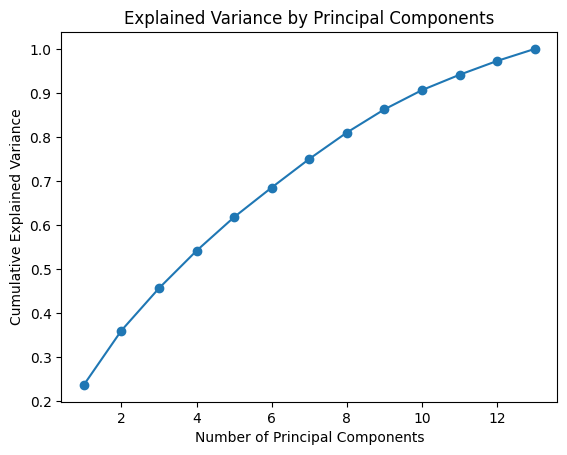

In [10]:
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()


In [11]:

threshold = 0.95
n_components = next(i for i, cum_var in enumerate(explained_variance_ratio.cumsum()) if cum_var >= threshold) + 1

In [12]:
print(f"Appropriate number of dimensions (threshold method): {n_components}")

Appropriate number of dimensions (threshold method): 12
